In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([['4月17日',0,0,0,15.2],
['4月24日',3,0,2,18.0],
['5月1日',5,2,4,18.3],
['5月8日',7,7,8,20.4],
['5月15日',12.5,9,14.5,19.1],
['5月22日',20,15,18,23.5]], columns=['time','tomato', 'bean', 'cucumber', 'temperature'])

df.time = pd.to_datetime(df.time, format='%m月%d日')
df.set_index('time', inplace=True)
df

,tomato,bean,cucumber,temperature
time,,,,
1900-04-17,0.0,0,0.0,15.2
1900-04-24,3.0,0,2.0,18.0
1900-05-01,5.0,2,4.0,18.3
1900-05-08,7.0,7,8.0,20.4
1900-05-15,12.5,9,14.5,19.1
1900-05-22,20.0,15,18.0,23.5


/Users/chieda/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


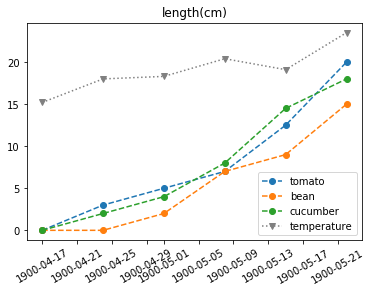

In [3]:
plt.title('length(cm)')
plt.plot(df[['tomato', 'bean', 'cucumber']], ls='--', marker='o')
plt.plot(df['temperature'], ls=':', marker='v', color='gray')
plt.xticks(rotation=30)
plt.legend(['tomato', 'bean', 'cucumber', 'temperature'])
plt.show()

## 値の変化を捉える
- 差による抽出

In [4]:
diff = df[['tomato','bean','cucumber']].diff().iloc[1:]
df2 = pd.concat([diff, df.temperature.iloc[1:]], axis=1)
df2

,tomato,bean,cucumber,temperature
time,,,,
1900-04-24,3.0,0.0,2.0,18.0
1900-05-01,2.0,2.0,2.0,18.3
1900-05-08,2.0,5.0,4.0,20.4
1900-05-15,5.5,2.0,6.5,19.1
1900-05-22,7.5,6.0,3.5,23.5


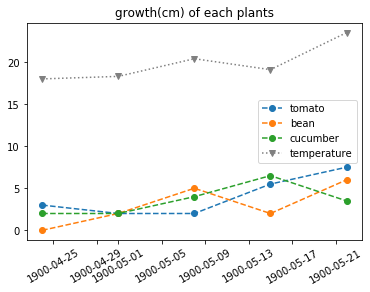

In [5]:
plt.title('growth(cm) of each plants')
plt.plot(df2[['tomato', 'bean', 'cucumber']], ls='--', marker='o')
plt.plot(df2['temperature'], ls=':', marker='v', color='gray')
plt.xticks(rotation=30)
plt.legend(['tomato', 'bean', 'cucumber', 'temperature'])
plt.show()

- 比による抽出

In [17]:
diff = (df[['tomato','bean','cucumber']] / df[['tomato','bean','cucumber']].shift(1)).iloc[1:]
df2 = pd.concat([diff, df.temperature.iloc[1:]], axis=1)
df2

,tomato,bean,cucumber,temperature
time,,,,
1900-04-24,inf,NaN,inf,18.0
1900-05-01,1.666667,inf,2.000000,18.3
1900-05-08,1.400000,3.500000,2.000000,20.4
1900-05-15,1.785714,1.285714,1.812500,19.1
1900-05-22,1.600000,1.666667,1.241379,23.5


- 指数による抽出

In [42]:
diff = df.iloc[1:]
diff.bean.iloc[0] = 2
diff = (diff / diff.iloc[0] * 100).astype(np.int)

/Users/chieda/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
diff

,tomato,bean,cucumber,temperature
time,,,,
1900-04-24,100,100,100,100
1900-05-01,166,100,200,101
1900-05-08,233,350,400,113
1900-05-15,416,450,725,106
1900-05-22,666,750,900,130


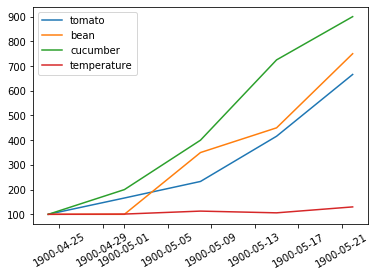

In [44]:
plt.plot(diff)
plt.xticks(rotation=30)
plt.legend(diff.columns)
plt.show()